In [ ]:
# 3-1~2

import tensorflow as tf
x = tf.ones(shape=(2, 1))

y = tf.zeros(shape=(2, 1))

z = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
z

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.97003376],
       [ 1.3220394 ],
       [-0.14925854]], dtype=float32)>

In [ ]:
# 3-10 Gradient Tape 사용
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

# 엔드-투-엔드 예제

In [5]:
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

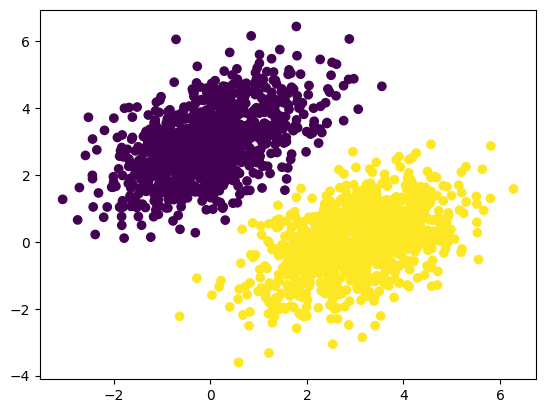

In [6]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [8]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 8.9957
1번째 스텝의 손실: 1.2374
2번째 스텝의 손실: 0.3183
3번째 스텝의 손실: 0.1928
4번째 스텝의 손실: 0.1658
5번째 스텝의 손실: 0.1519
6번째 스텝의 손실: 0.1406
7번째 스텝의 손실: 0.1304
8번째 스텝의 손실: 0.1212
9번째 스텝의 손실: 0.1128
10번째 스텝의 손실: 0.1051
11번째 스텝의 손실: 0.0980
12번째 스텝의 손실: 0.0916
13번째 스텝의 손실: 0.0858
14번째 스텝의 손실: 0.0805
15번째 스텝의 손실: 0.0756
16번째 스텝의 손실: 0.0712
17번째 스텝의 손실: 0.0672
18번째 스텝의 손실: 0.0635
19번째 스텝의 손실: 0.0601
20번째 스텝의 손실: 0.0570
21번째 스텝의 손실: 0.0543
22번째 스텝의 손실: 0.0517
23번째 스텝의 손실: 0.0494
24번째 스텝의 손실: 0.0473
25번째 스텝의 손실: 0.0453
26번째 스텝의 손실: 0.0436
27번째 스텝의 손실: 0.0419
28번째 스텝의 손실: 0.0405
29번째 스텝의 손실: 0.0391
30번째 스텝의 손실: 0.0379
31번째 스텝의 손실: 0.0368
32번째 스텝의 손실: 0.0358
33번째 스텝의 손실: 0.0349
34번째 스텝의 손실: 0.0340
35번째 스텝의 손실: 0.0332
36번째 스텝의 손실: 0.0325
37번째 스텝의 손실: 0.0319
38번째 스텝의 손실: 0.0313
39번째 스텝의 손실: 0.0308


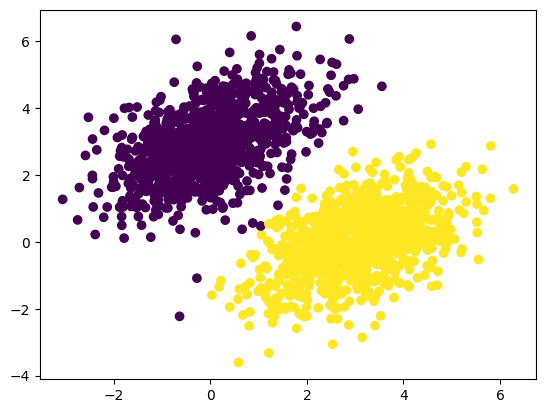

In [9]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]> 0.5)
plt.show()

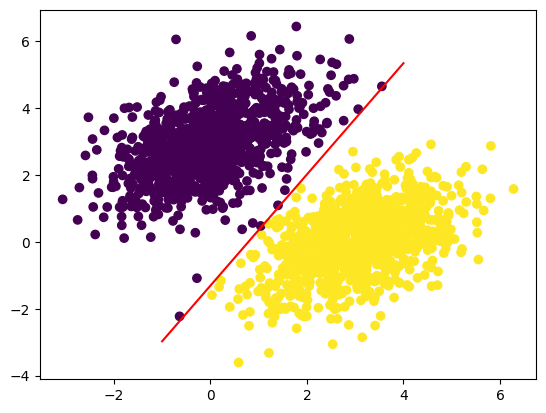

In [10]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]> 0.5)
plt.show()

In [13]:
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

indices_permuation = np.random.permutation(len(inputs))

history = model.fit(
    inputs,
    targets,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
16/16 [==============================] - 2s 3ms/step - loss: 4.4602 - accuracy: 0.3570
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 4.2183 - accuracy: 0.3445
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 4.0176 - accuracy: 0.3350
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 3.8349 - accuracy: 0.3265
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 3.6585 - accuracy: 0.3225
